In [5]:
from calimba.analysis.utilities import add_folder_to_path

add_folder_to_path('/home/anleg84/GitHub/Calimba/')

from utilities import *
from data import *
from atlas import *
from networks import *
from behavior import *
from timeseries import *
from visualization import *
from useful_functions import *

import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

%matplotlib inline
plt.rcParams['font.size'] = 6

# Loading required data to make Figure 2

In [59]:
top_directory = '/media/anleg84/One Touch/Data/Main/'
atlas_path = '/home/anleg84/Documents/Atlas/Mapzebrain/'
excluded = [10, 34, 44, 49, 69]
atlas = MapzebrainAtlas(atlas_path)
atlas.directedMatrix = np.load('Data/directed_terminals_expanded.npy')
atlas.undirectedMatrix = np.load('Data/undirected_terminals_expanded.npy')
acronyms = list(np.delete(atlas.acronyms, excluded))

FC = np.load('Results/FC_matrix.npy')
SC = delete_rows_and_columns(atlas.undirected, excluded)
SC_dir = delete_rows_and_columns(atlas.directed, excluded)
triangle = np.triu_indices(FC.shape[0], 1)

region_centroids = np.concatenate([atlas.regionCentroids['left'], atlas.regionCentroids['right']], axis=0)
region_centroids[:, 1] = 974 - region_centroids[:, 1]
region_centroids = np.delete(region_centroids, np.concatenate([excluded, np.array(excluded) + 70]), axis=0)

corrs_0 = np.load('Results/figure2_directionality_corrs0.npy')
corrs_1 = np.load('Results/figure2_directionality_corrs1.npy')
corrs_2 = np.load('Results/figure2_directionality_corrs2.npy')
number_of_connections = np.load('Results/number_of_connections.npy')

EP = np.load('Results/figure2_matrix_EP.npy')
ISPL = np.load('Results/figure2_matrix_ISPL.npy')
CO = np.load('Results/figure2_matrix_comm.npy')

fit_full = np.load('Results/figure2_fit_full.npy')
fit_regions = normalize(np.load('Results/figure2_fit_regions.npy'))

centroids = np.load('Results/figure2_scatter_centroids.npy')
Rsquared = np.load('Results/figure2_rsquared.npy')

centroids_left = np.delete(atlas.regionCentroids['left'], excluded, axis=0)
centroids_right = np.delete(atlas.regionCentroids['right'], excluded, axis=0)
deg_wei_SC = np.load('Results/figure2_degree_SC.npy')
deg_wei_FC = np.load('Results/figure2_degree_FC.npy')

expvar = np.load('Results/figure2_PCA_expvar.npy')
sPC1 = np.load('Results/figure2_sPC1.npy')

Rsquared_single = np.load('Results/figure2_rsquared_single.npy')
Rsquared_baseline = np.load('Results/figure2_rsquared_baseline.npy')
predictors_names = np.load('Results/figure2_predictors_names.npy')
Rsquared_multilinear = np.load('Results/figure2_multilinear_rsquared.npy')

euc = np.load('Results/figure2_predictor_euc.npy')
pl = np.load('Results/figure2_predictor_pl.npy')
comm = np.load('Results/figure2_predictor_comm.npy')
cs = np.load('Results/figure2_predictor_cs.npy')

In [8]:
def plot_smooth_histogram(ax, data, bins, N_interp=1000, sigma=20, density=False, color='black', edgecolor='black', alpha=1, linewidth=1):
    h1 = np.histogram(data, bins=bins, density=density)
    #plt.close()
    y1 = gaussian_filter1d(interpolate_signal(h1[0], N_interp), sigma)
    x1 = interpolate_signal(h1[1], N_interp)
    ax.fill_between(x1, 0, y1, color=color, edgecolor='None', alpha=alpha)
    ax.plot(x1, y1, color=edgecolor, linewidth=linewidth)

# New figure

In [6]:
plt.rcParams['font.size'] = 6

red = 1.1 * np.array([186, 44, 102]) / 255
color1 = [0, 0, 0]
blue = hex2rgb('#006DAA')
color3 = [1, 1, 1]
colormap = make_cmap([color1, blue, color3], [0, 0.5, 1])

cmap_div = make_cmap([blue, [1, 1, 1], red], [0, 0.5, 1])

In [8]:
blue

array([0.        , 0.42745098, 0.66666667])

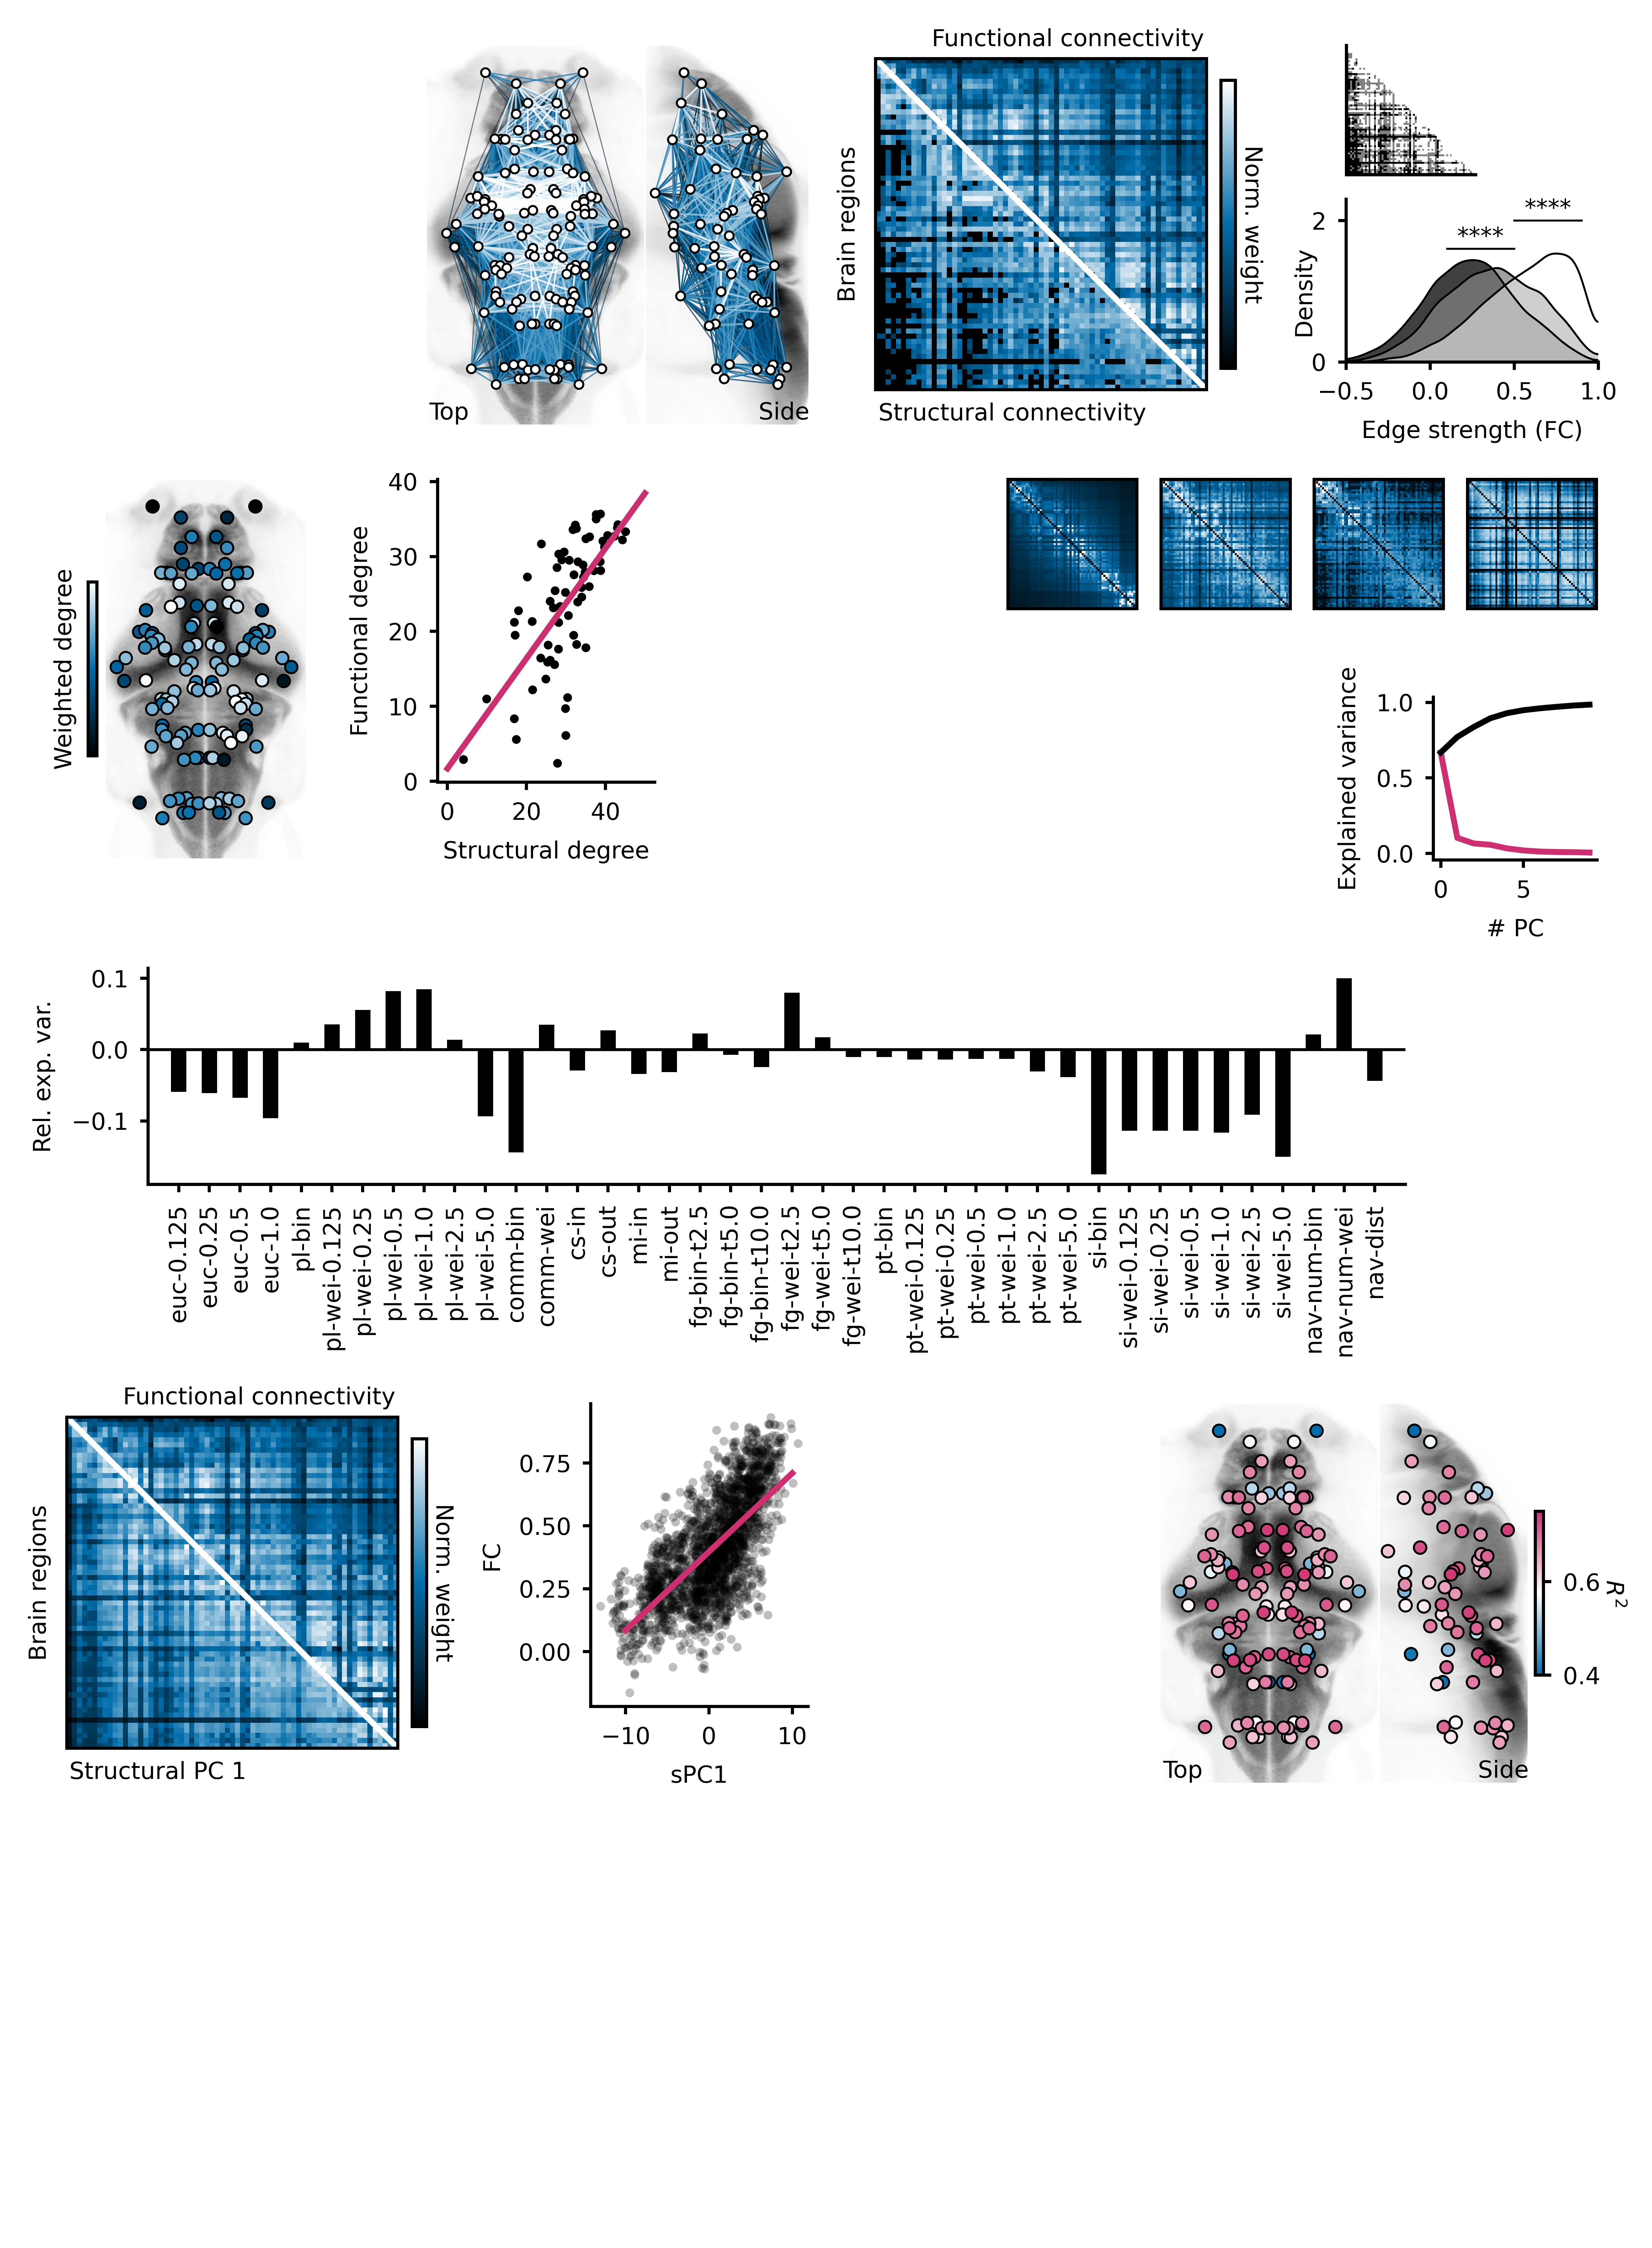

In [75]:
fig = PaperFigure(figsize=(7, 10), dpi=900)

fig.set_tick_length(2)
fig.set_font_size(6)
fig.add_background() # Useful when messing with the layout

# Layout ------------------------------------------------------------------------------------

x_b = 1.65
fig.add_axes('b', (x_b, 0), 1, 1.75)
fig.add_axes('b2', (x_b + 1, 0), 0.75, 1.75)
fig.add_axes('c', (x_b + 1 + 0.75 + 0.3, 0), 1.65, 1.65)
fig.add_axes('d', (5.85, 0), 0.6, 0.6)
fig.add_axes('d2', (5.85, 0.71), 1.5, 0.75)

fig.add_axes('e', (0.1, 2), 1, 1.75)
fig.add_axes('f', (1.70, 2), 1, 1.4)

fig.add_axes('h1', (4.3, 2), 0.6, 0.6)
fig.add_axes('h2', (4.3 + 0.6 + 0.1, 2), 0.6, 0.6)
fig.add_axes('h3', (4.3 + 1.2 + 0.2, 2), 0.6, 0.6)
fig.add_axes('h4', (4.3 + 1.8 + 0.3, 2), 0.6, 0.6)
fig.add_axes('h5', (7 - 0.75, 3), 0.75, 0.75)

fig.add_axes('y', (0.375, 4.25), 5.75, 1)

delta_y = 2.25
fig.add_axes('i', (0, 4 + delta_y), 1.65, 1.65)
fig.add_axes('j', (2.4, 4 + delta_y), 1, 1.4)

x_b = 7 - 2
fig.add_axes('l', (x_b, 4 + delta_y), 1, 1.75)
fig.add_axes('l2', (x_b + 1, 4 + delta_y), 0.75, 1.75)

# Content -----------------------------------------------------------------------------------

# b) panel (left) 
ax = fig.axes['b']
bbox = ax.get_position()
x0, y1 = bbox.x0, bbox.y1
ax.imshow(atlas.XYprojection, cmap='binary', aspect='auto')
draw_graph(ax, np.tile(SC, (2, 2)), region_centroids, percentile=25, s=5, edge_cmap=colormap, alpha=1, edge_vmin=0.5, edge_vmax=0.9,
          linewidth=0.5, node_edgewidth=0.5)
ax.set_xlim([65, 505])
ax.set_ylim([850, 50])
ax.text(70, 850, 'Top', ha='left', va='bottom')
ax.axis('off')

# b) panel (right)
ax = fig.axes['b2']
ax.imshow(np.rot90(atlas.XZprojection, k=3), cmap='binary', aspect='auto')
c = np.flip(np.delete(region_centroids, 0, axis=1), axis=1)
c[:, 0] = 359 - c[:, 0]
draw_graph(ax, np.tile(SC, (2, 2)), c, percentile=25,
           s=5, edge_cmap=colormap, alpha=0.5, edge_vmin=0.5, edge_vmax=0.9, node_edgewidth=0.5, linewidth=0.5)
ax.set_xlim([50, 359])
ax.set_ylim([850, 50])
ax.set_xticks([])
ax.set_yticks([])
ax.text(359, 850, 'Side', ha='right', va='bottom')
ax.axis('off')

# c) panel 
ax = fig.axes['c']
bbox = ax.get_position()
x0, y1 = bbox.x0, bbox.y1
matrix = normalize(np.copy(SC))
matrix[triangle] = normalize(np.copy(FC))[triangle]
cax = ax.imshow(matrix, cmap=colormap)
cbar = plt.colorbar(cax, ax=ax, fraction=0.04, pad=0.04)
cbar.set_ticks([])
cbar.set_label('Norm. weight', rotation=270, labelpad=7)
ax.plot([0, 64.5], [0, 64.5], color='white', linewidth=1.5)
ax.text(64, -3, 'Functional connectivity', ha='right')
ax.text(0, 67, 'Structural connectivity', ha='left', va='top')
ax.set_ylabel('Brain regions')
ax.set_xticks([])
ax.set_yticks([])
#plt.axis('off')

# d) panel (top)
ax = fig.axes['d']
matrix = np.copy(number_of_connections)
mask = np.triu_indices(matrix.shape[0], k=0)
masked_matrix = np.ma.array(matrix, mask=np.zeros_like(matrix))
masked_matrix[mask] = np.ma.masked
ax.imshow(masked_matrix, cmap='gray')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# d) panel (bottom)
ax = fig.axes['d2']
bbox = ax.get_position()
x0, y1 = bbox.x0, bbox.y1
bins = np.linspace(-1, 1, 50)
plot_smooth_histogram(ax, corrs_0, bins, sigma=20, color='black', edgecolor='black', alpha=0.75, density=True, linewidth=0.5)
plot_smooth_histogram(ax, corrs_1, bins, sigma=20, color=[0.5, 0.5, 0.5], edgecolor='black', alpha=0.75, density=True, linewidth=0.5)
plot_smooth_histogram(ax, corrs_2, bins, sigma=20, color='white', edgecolor='black', alpha=0.5, density=True, linewidth=0.5)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Edge strength (FC)')
ax.set_xlim([-0.5, 1])
ax.set_ylim([0, 2.3])
ax.plot([0.1, 0.5], [1.6, 1.6], color='black', linewidth=0.5)
ax.text(0.3, 1.6, '****', ha='center', va='bottom')
ax.plot([0.5, 0.9], [2, 2], color='black', linewidth=0.5)
ax.text(0.7, 2, '****', ha='center', va='bottom')
ax.set_yticks([0, 2])
ax.text(-0.75, 1, 'Density', ha='center', va='center', rotation=90)

# e) panel 
ax = fig.axes['e']
ax.imshow(atlas.XYprojection, cmap='binary', aspect='auto')
ax.scatter(centroids_left[:, 0] - 15, 974 - centroids_left[:, 1], s=10,
            edgecolor='black', linewidth=0.5, c=zscore(deg_wei_SC), cmap=colormap)
cax = ax.scatter(284 + (284 - centroids_left[:, 0]) + 10, 974 - centroids_left[:, 1], s=10,
            edgecolor='black', linewidth=0.5, c=zscore(deg_wei_FC), cmap=colormap)
cbar = plt.colorbar(cax, ax=ax, fraction=0.04, pad=0.04, location='left')
cbar.set_ticks([])
cbar.set_label('Weighted degree', rotation=90, labelpad=3)
ax.set_xlim([65, 505])
ax.set_ylim([850, 50])
ax.axis('off')

# f) panel
ax = fig.axes['f']
a, b = np.polyfit(deg_wei_SC, deg_wei_FC, deg=1)
ax.scatter(deg_wei_SC, deg_wei_FC, color='black', s=5, alpha=1, edgecolor='None')
x = np.linspace(0, 50, 10)
ax.plot(x, a * x + b, color=red, linewidth=1.5)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Structural degree')
ax.set_ylabel('Functional degree')

# h) panel
ax = fig.axes['h1']
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(euc, cmap=colormap, vmax=0.5)
ax = fig.axes['h2']
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(pl, cmap=colormap)
ax = fig.axes['h3']
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(comm, cmap=colormap, vmax=0.5)
ax = fig.axes['h4']
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(cs, cmap=colormap, vmax=1.1)
ax = fig.axes['h5']
ax.plot(np.arange(10), expvar[:10], color=red, label='Fraction of variance')
ax.plot(np.arange(10), np.cumsum(expvar)[:10], color='black', label='Cumulative variance')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('# PC')
ax.set_ylabel('Explained variance')

# Long-ass panel
ax = fig.axes['y']
N_predictors = len(predictors_names)
ax.bar(np.arange(N_predictors), np.abs(Rsquared_single) - Rsquared_baseline, color='black', width=0.5)
ax.plot([0 - 1, N_predictors], [0, 0], color='black', linewidth=0.75)
ax.set_xticks(np.arange(N_predictors), predictors_names, rotation=90)
ax.set_xlim([-1, N_predictors])
ax.spines[['top', 'right']].set_visible(False)
ax.set_ylabel('Rel. exp. var.')

# i) panel
ax = fig.axes['i']
bbox = ax.get_position()
x0, y1 = bbox.x0, bbox.y1
matrix = normalize(np.copy(sPC1))
matrix[triangle] = normalize(np.copy(FC))[triangle]
cax = ax.imshow(matrix, cmap=colormap)
cbar = plt.colorbar(cax, ax=ax, fraction=0.04, pad=0.04)
cbar.set_ticks([])
cbar.set_label('Norm. weight', rotation=270, labelpad=7)
ax.plot([0, 64.5], [0, 64.5], color='white', linewidth=1.5)
ax.text(64, -3, 'Functional connectivity', ha='right')
ax.text(0, 67, 'Structural PC 1', ha='left', va='top')
ax.set_ylabel('Brain regions')
ax.set_xticks([])
ax.set_yticks([])
#plt.axis('off')

# j) panel
ax = fig.axes['j']
a, b = np.polyfit(sPC1[triangle], FC[triangle], deg=1)
x = np.linspace(-10, 10)
ax.scatter(sPC1[triangle], FC[triangle], color='black', s=5, alpha=0.25, edgecolor='None')
ax.plot(x, a * x + b, color=red, linewidth=1.5)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('sPC1')
ax.set_ylabel('FC')

# l) panel
ax = fig.axes['l']
bbox = ax.get_position()
x0, y1 = bbox.x0, bbox.y1
ax.imshow(atlas.XYprojection, cmap='binary', aspect='auto')
R = np.tile(np.array(Rsquared_multilinear), (1,2)).ravel()
order = np.argsort(R)
cax = ax.scatter(centroids[order, 0], 974 - centroids[order, 1], edgecolor='black', s=10, c=R[order], cmap=cmap_div, vmin=0.4, vmax=0.75, linewidth=0.5)
#cbar = plt.colorbar(cax, ax=ax, fraction=0.015, pad=0.02)
ax.set_xlim([65, 505])
ax.set_ylim([850, 50])
ax.text(70, 850, 'Top', ha='left', va='bottom')
ax.axis('off')

# l) panel (right)
ax = fig.axes['l2']
ax.imshow(np.rot90(atlas.XZprojection, k=3), cmap='binary', aspect='auto')
cax = ax.scatter(359 - centroids[order, 2], 974 - centroids[order, 1], edgecolor='black', s=10, c=R[order], cmap=cmap_div, vmin=0.4, vmax=0.75, linewidth=0.5)
cbar = plt.colorbar(cax, ax=ax, fraction=0.05, pad=0.04)
cbar.set_label(r'$R^2$', rotation=270, labelpad=6)
ax.set_xlim([50, 359])
ax.set_ylim([850, 50])
ax.set_xticks([])
ax.set_yticks([])
ax.text(359, 850, 'Side', ha='right', va='bottom')
ax.axis('off')

fig.show()

In [73]:
fig.save('/home/anleg84/Documents/Figures/PaperNetworks2024/figure2_incomplete.png')

In [76]:
fig.save('/home/anleg84/Documents/Figures/PaperNetworks2024/figure2_incomplete.svg')